# Airbnb Comparison between NYC and Boston

![NYCvsBOS](./boston-vs-new-york.jpg)

The following report gathers the Greater Boston Area's Airbnb data available and New York Cities to identify general trends, similarities and differences between these two cities/areas.


## Context
New York city (NYC) is known to be one of the most concentrated business hubs of the USA and among the world's major commercial, financial and cultural centers. As one of the most visited cities in the world for both business and pleasure its no wonder there is high demand for temporary and long term housing options.

Boston on the other hand is one of the oldest cities in the USA and has become the largest biotechnology hubs worldwide. It constantly fighting close with San Francisco for the title of City with the most Startup Business. Not to mention the Greater Boston Area is known to be a global leader in higher education with some of the most recognized educational institutions: Harvard University, MIT, Northeastern University and others. 


## Goal

Both being in different ways very attractive cities due to their histories, business and educational reputation.
The following report will focus in understanding trends between:
- The highest concentration of Airbnb listings per neighborhood.
- The highest price per night per neighborhood.
- From the above, is there a proportional offering between cities in terms of room type?

**For the purpose of this analysis the data was limited to listings that the price per night is under or equal to $500.**
Do to limited data available two datasets Cambridge and Boston datasets were combined. This was to simulate the "Greater Boston Area".


## Load Data

In [2]:
!pip install folium fontawesome

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import folium

nyc = pd.read_csv('./NYCvsBoston/nyc_listings.csv')
bos = pd.read_csv('./NYCvsBoston/bos+camb_listings.csv')
nyc = nyc[(nyc['price'] <= 500)]
bos = bos[(bos['price'] <= 500)]
nyc['Listings/neighborhood'] = nyc.groupby('neighbourhood')['neighbourhood'].transform('count')
bos['Listings/neighborhood'] = bos.groupby('neighbourhood')['neighbourhood'].transform('count')


##Highest concentration of Airbnb listings per neighborhood.

Comparing the concentration of Airbnb's per neighborhood is a way of identifying the areas of highest demand in the city.
Bellow you can see the top 10 neighborhoods of each city that has the most listings.
We notice first off that NYC has substantially a higher demand/number of listings. This most likely comes from the infrastructure differences between the cities. Where New York cities has a higher buildings than Boston. The skyline alone for Boston is lower than the one for New York City.

Text(0.5, 0, 'Price (USD)')

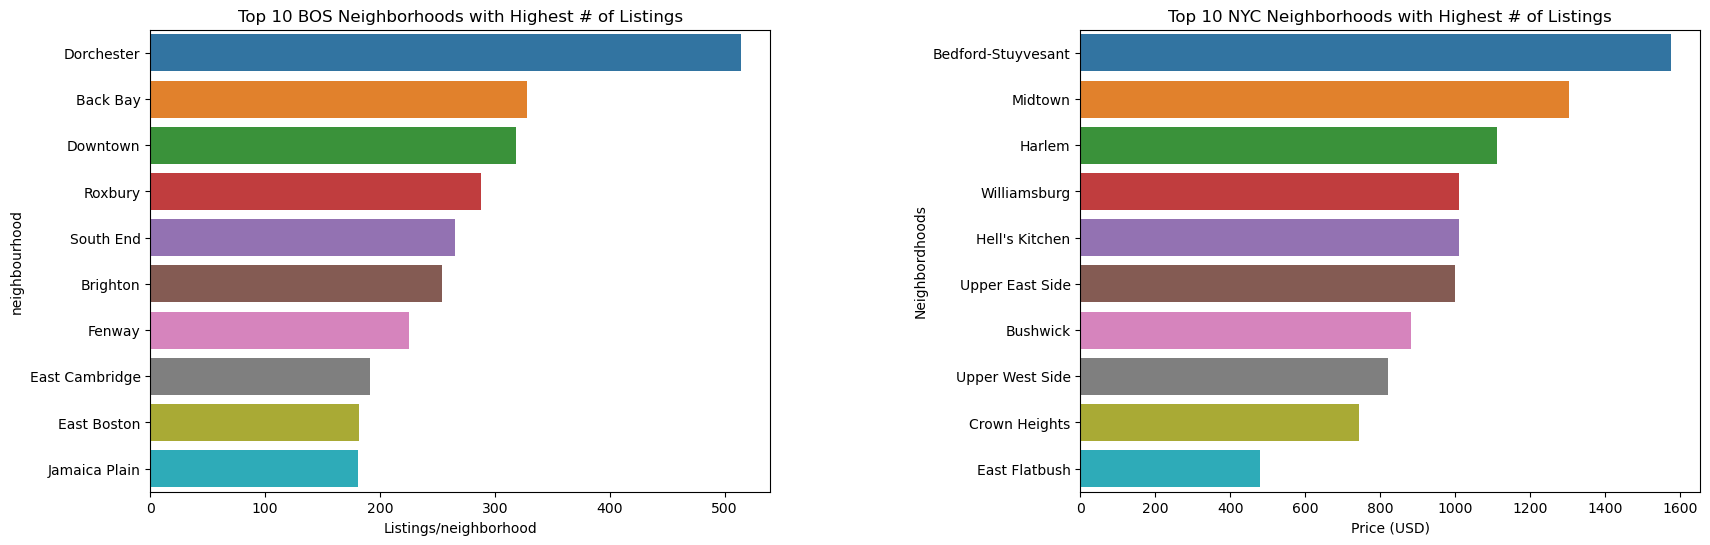

In [36]:
bos_neighbylist = bos.groupby('neighbourhood', as_index=False)[
    ['price','Listings/neighborhood','minimum_nights','availability_365']
].mean().sort_values(by=['Listings/neighborhood'], ascending=False).reset_index(drop=True).head(10)

nyc_neighbylist = nyc.groupby('neighbourhood', as_index=False)[
    ['price','Listings/neighborhood','minimum_nights','availability_365']
].mean().sort_values(by=['Listings/neighborhood'], ascending=False).reset_index(drop=True).head(10)

top5listingsneighBOS = ['Dorchester','Back Bay','Downtown','Roxbury','South End']
top5listingsneighNYC = ['Bedford-Stuyvesant','Midtown','Harlem','Williamsburg',"Hell's Kitchen"]


fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(wspace=0.5)

sns.barplot(data=bos_neighbylist, 
             y="neighbourhood",
             x='Listings/neighborhood',
             ax = axes[0]
)
axes[0].set_title('Top 10 BOS Neighborhoods with Highest # of Listings')

sns.barplot(data=nyc_neighbylist, 
             y="neighbourhood",
             x='Listings/neighborhood',
             ax = axes[1]
)
axes[1].set_title('Top 10 NYC Neighborhoods with Highest # of Listings')
plt.ylabel('Neighbordhoods')
plt.xlabel('Price (USD)')

Next there is the mapping of the top 5 neighborhoods above to show their physical location. Here we can appreciate how the areas for Boston tend to be more spread apart compared to the ones in NYC.

In [22]:
#Define the data that incluedes only the TOP 5 neighborhoods in the graphs above
datalist_bos=d_bos.loc[d_bos['neighbourhood'].isin(top5listingsneighBOS)]
datalist_nyc=d_nyc.loc[d_nyc['neighbourhood'].isin(top5listingsneighNYC)]


from folium.plugins import HeatMap

# Step 1: Create an empty map with a starting point.
map_listingsnyc = folium.Map(
    location = [
        40.7128,
        -74.0060
    ],
    zoom_start=11, 
    tiles="OpenStreetMap"
)
map_listingsnyc.add_child(
    HeatMap(
        datalist_nyc[['latitude','longitude']],
    )
)

In [30]:
map_listingsbos = folium.Map(
    location = [
        42.3601,
        -71.0589
    ],
    zoom_start=12, 
    tiles="OpenStreetMap"
)
map_listingsbos.add_child(
    HeatMap(
        datalist_bos[['latitude','longitude']],
    )
)

###Highest price per night per neighborhood.

When we look at the data with different perspective to identify where the average most expensive neighborhood for Airbnb are, we find that the top 10 list changes compared to our previous comparison.

Text(0.5, 0, 'Price (USD)')

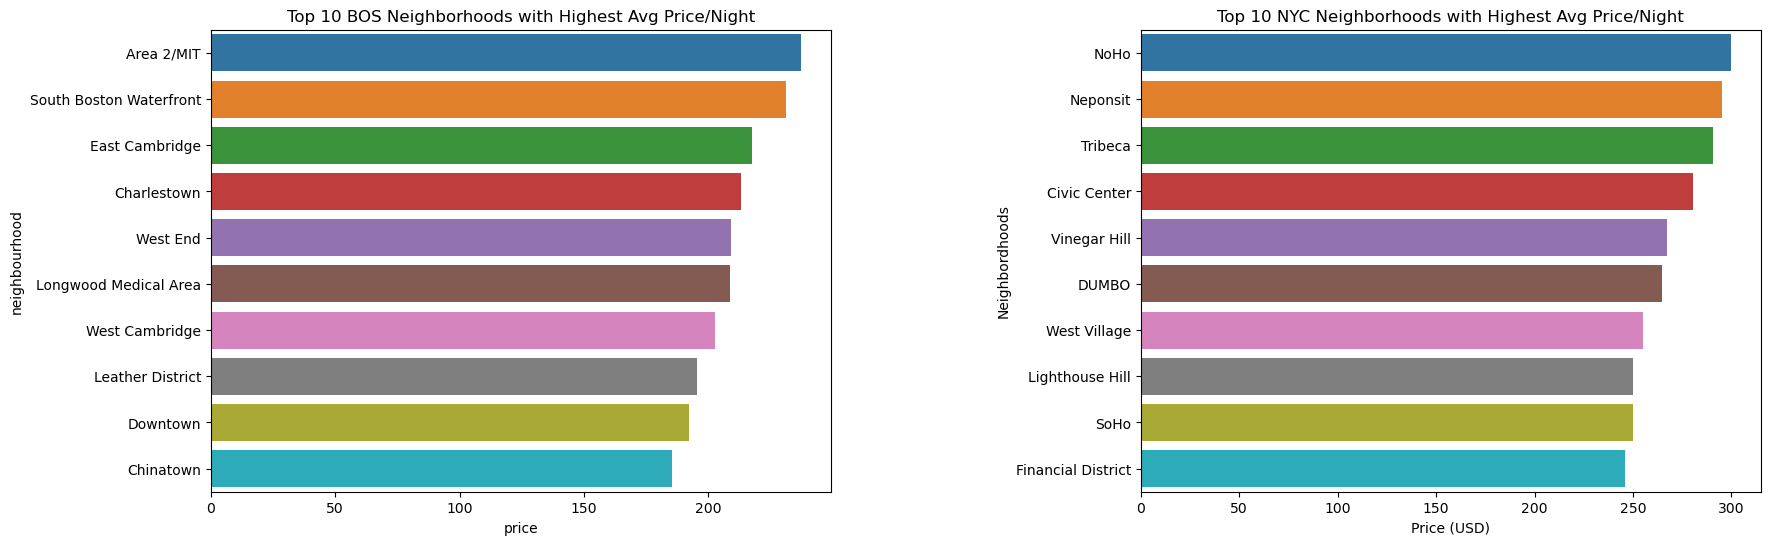

In [34]:
bos_neighbyprice = bos.groupby('neighbourhood', as_index=False)[
    ['price','Listings/neighborhood','minimum_nights','availability_365']
].mean().sort_values(by=['price'], ascending=False).reset_index(drop=True).head(10)

nyc_neighbyprice = nyc.groupby(['neighbourhood'], as_index=False)[
    ['price','Listings/neighborhood','minimum_nights','availability_365']
].mean().sort_values(by=['price'], ascending=False).reset_index(drop=True).head(10)

top5priceneighBOS = ['Area 2/MIT','South Boston Waterfront','East Cambridge', 'Charlestown', 'West End']
top5priceneighNYC=['NoHo','Neponsit','Tribeca','Civic Center','Vinegar Hill']

fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(wspace=0.5)

sns.barplot(data=bos_neighbyprice, 
             y="neighbourhood",
             x='price',
             ax = axes[0]
)
axes[0].set_title('Top 10 BOS Neighborhoods with Highest Avg Price/Night')

sns.barplot(data=nyc_neighbyprice, 
             y="neighbourhood",
             x='price',
             ax = axes[1]
)
axes[1].set_title('Top 10 NYC Neighborhoods with Highest Avg Price/Night')
plt.ylabel('Neighbordhoods')
plt.xlabel('Price (USD)')

Below we see that now the neighborhoods that have the highest price per night are not necessarily related to where there is more demand. This most likely is because when there is high demand there has to be competition to maintain the properties booked the longest.
On another hand we can notice that these areas are in particular areas of interest. Like for Boston number 1 for highest avg price per night is Area 2/MIT. Right next to one of the most prestigious technology institutions in Boston.
 
While for NYC there is NoHo which is recognized for its loft apartments and influential residents. Known to be very central and close to 2 different metro lines. 
South Boston Waterfront: One of the fastest growing areas in Boston, due to the buildings being brand new, the entertaining businesses established in the area does call for great demand for the Airbnb business.
East Cambridge: One of the better connected neighborhoods in Boston with two metro lines. Not to close nor too far from the city center.


In [21]:
#Define the data that incluedes only the TOP 5 neighborhoods in the graphs above
dataprice_nyc=d_nyc.loc[d_nyc['neighbourhood'].isin(top5priceneighNYC)]
dataprice_bos=d_bos.loc[d_bos['neighbourhood'].isin(top5priceneighBOS)]

In [29]:
map_pricebos = folium.Map(
    location = [
        42.3601,
        -71.0589
    ],
    zoom_start=13, 
    tiles="OpenStreetMap"
)
map_pricebos.add_child(
    HeatMap(
        dataprice_bos[['latitude','longitude']],
    )
)

While for NYC there is NoHo which is recognized for its loft apartments and influential residents. Known to be very central and close to 2 different metro lines. 
Tribeca: Another neighborhood with residential loft space with trendy boutiques and restaurants. Also known to be one of the most expensive neighborhoods to live in. 
Civic Center: The center for most government affairs in the city having New York City Hall and the New York County Supreme Court. Do to most of the building in the area being government owned there is a chance most Airbnb's require high maintenance/standards to comply with the neighbors security. Their for high price Airbnb's.
Vinegar Hill: on another hand is right outside Manhattan. I would compare it somehow with the Charlestown Boston neighborhood as its not right in the center. Not as well connected, but the views and proximity to the city is its most attractive feature for Airbnb users.


In [23]:
map_pricenyc = folium.Map(
    location = [
        40.7128,
        -74.0060
    ],
    zoom_start=11, 
    tiles="OpenStreetMap"
)
map_pricenyc.add_child(
    HeatMap(
        dataprice_nyc[['latitude','longitude']],
    )
)

Based on the above comparison you could say that there is a difference between cities in terms of what attracts the demand and price of listings.
There does seem to be a factor driving the differences between the highest price listings vs the areas of highest demand.

###Proportional offering between cities in terms of room type?

One things is looking at the price and # of properties per neighborhood. But what about the type of rooms being offered. Is there a big difference among the top 5 for each list above in terms of type of property being offered?

Below is the Boston comparison. It is not surprising that there are more full apartments being offered than shared rooms. 
It is surprising to see very highly priced private rooms among the highest Price per night listing.


Text(0.5, 1.0, 'BOS Room Types in Neighborhoods with highest Price/night')

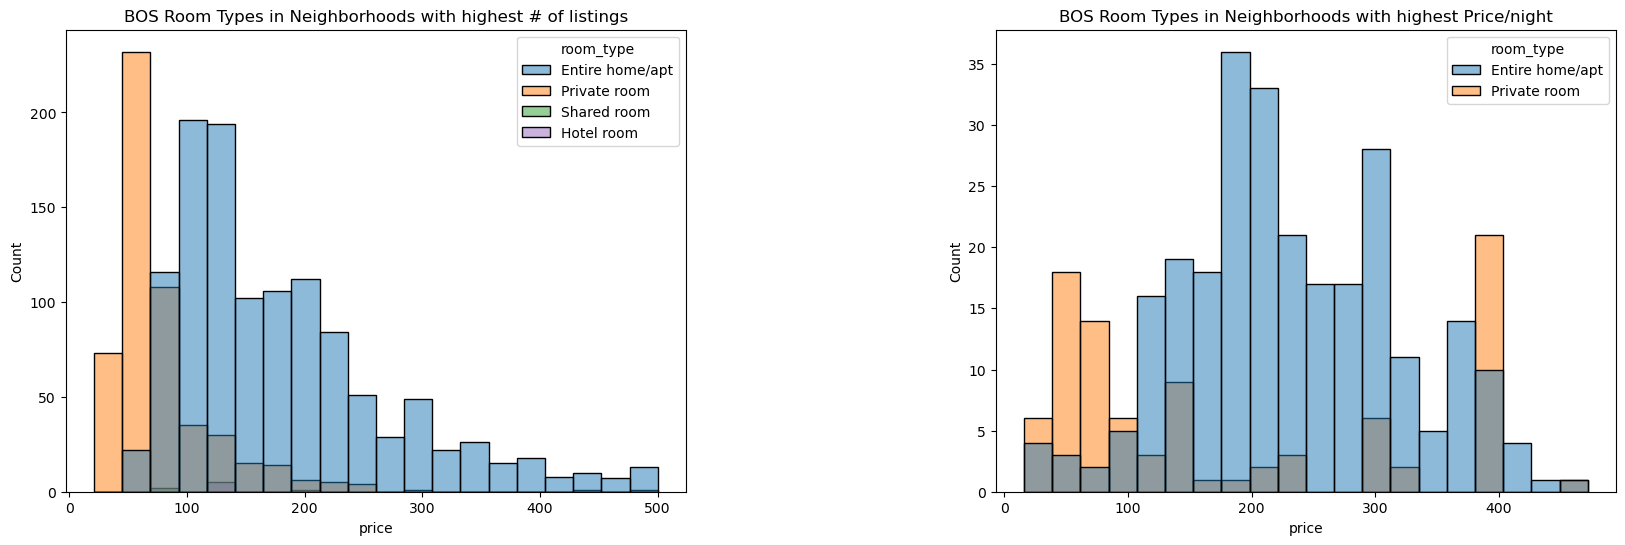

In [47]:
#defined to have the same room_type color labels in both the NYC and BOS graphs.
room_typecolors = {'Entire home/apt':"C0",'Private room':'C1','Shared room':'C2','Hotel room':'C4'}

#Boston histplots
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(wspace=0.5)
sns.histplot(data=d_bos.loc[d_bos['neighbourhood'].isin(top5listingsneighBOS)], 
             x="price",
             hue="room_type",
             palette=room_typecolors,
             bins=20,
             ax = axes[0]
)
axes[0].set_title('BOS Room Types in Neighborhoods with highest # of listings')

sns.histplot(data=d_bos.loc[d_bos['neighbourhood'].isin(top5priceneighBOS)], 
             x="price",
             hue="room_type",
             palette=room_typecolors,
             bins=20,
             ax = axes[1]
)
axes[1].set_title('BOS Room Types in Neighborhoods with highest Price/night')

For NYC we see a similar trend on the highest number of listings per neighborhood to that of Boston. With few more shared rooms and hotel rooms.

On the highest Average Price/Night graph though there are not as many listings compared to Boston.
There are more shared rooms and on a higher price range. 

Text(0.5, 1.0, 'NYC Room Types in Neighborhoods with highest Price/night')

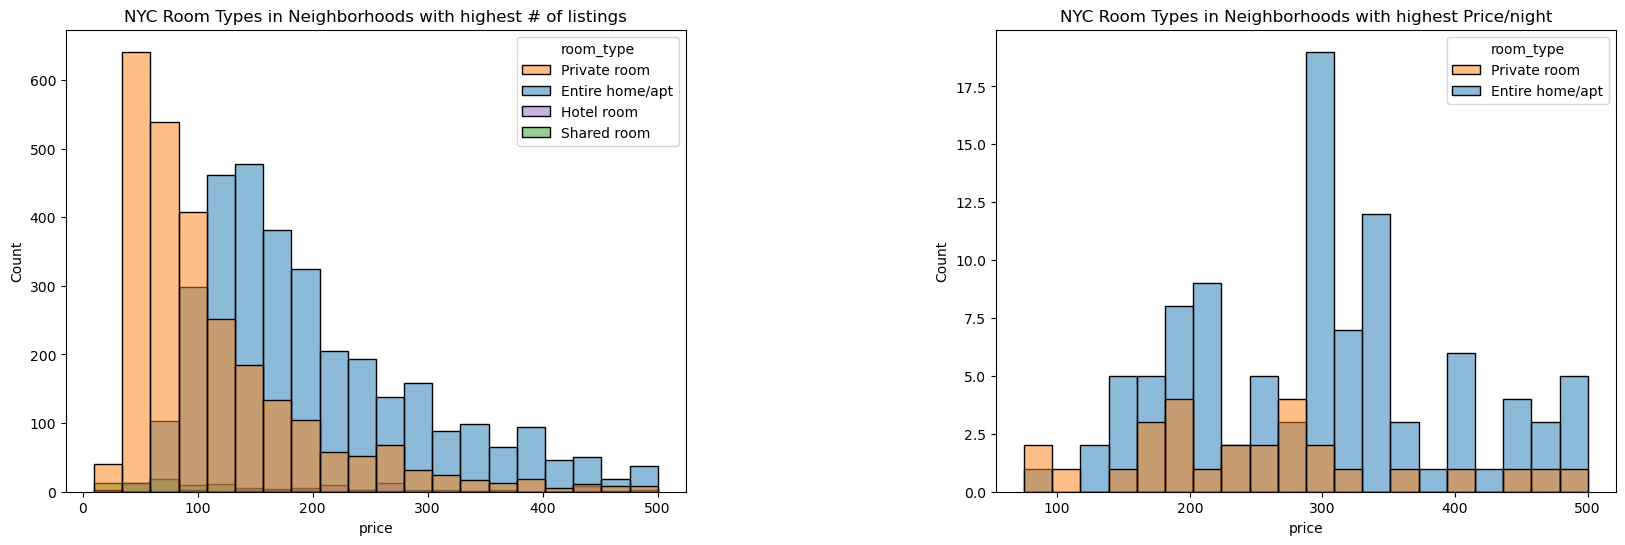

In [48]:
#NYC histplots
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.subplots_adjust(wspace=0.5)
sns.histplot(data=d_nyc.loc[d_nyc['neighbourhood'].isin(top5listingsneighNYC)], 
             x="price",
             hue="room_type",
             bins=20,
             palette=room_typecolors,
             ax = axes[0]
)
axes[0].set_title('NYC Room Types in Neighborhoods with highest # of listings')

sns.histplot(data=d_nyc.loc[d_nyc['neighbourhood'].isin(top5priceneighNYC)], 
             x="price",
             hue="room_type",
             bins=20,
             palette=room_typecolors,
             ax = axes[1]
)
axes[1].set_title('NYC Room Types in Neighborhoods with highest Price/night')


Data on this report came from [Inside Airbnb](http://insideairbnb.com/). Dated: 2023